## Energy Consumption and Population Growth

### This notebook contains data analysis processes in fulfillment of the Energy Data Analysis ERBE module

#### This notebook aims to answer the overarching research question: What is the historical relationship between population growth and electricity consumption, between the years 2015 and 2020, in the UK? 

The data used is open access: 
BEIS (2022) available from: https://www.gov.uk/government/collections/sub-national-electricity-consumption-data#lsoa/msoa-data;
ONS (2021) available from: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland 
London Borough of Camden (2022) NSPL, available from: https://opendata.camden.gov.uk/Maps/National-Statistics-Postcode-Lookup-UK-Coordinates/77ra-mbbn/data

## Set up

In [91]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

## Data reading

In [2]:
# List in the energy consumption datasets
csv_files=[filename for filename in os.listdir() if filename.endswith('.csv')]
csv_files

['Dataset2015A-L.csv',
 'Dataset2015L-Z.csv',
 'Dataset2016A-K.csv',
 'Dataset2016K-Z.csv',
 'Dataset2017A-K.csv',
 'Dataset2017K-Z.csv',
 'Dataset2018A-K.csv',
 'Dataset2018K-Z.csv',
 'Dataset2019A-K.csv',
 'Dataset2019K-Z.csv',
 'Dataset2020A-K.csv',
 'Dataset2020K-Z.csv']

In [3]:
# read in all the energy consumption files into single dataframe 
for i, csv_file in enumerate(csv_files):
    print(i, csv_file)
    df1=pd.read_csv(csv_file)
    df1['Year']=int(csv_file[7:11])
    if i==0:
        df=df1
    else:
        df=df.append(df1, ignore_index=True)
df

0 Dataset2015A-L.csv
1 Dataset2015L-Z.csv
2 Dataset2016A-K.csv
3 Dataset2016K-Z.csv
4 Dataset2017A-K.csv
5 Dataset2017K-Z.csv
6 Dataset2018A-K.csv
7 Dataset2018K-Z.csv
8 Dataset2019A-K.csv
9 Dataset2019K-Z.csv
10 Dataset2020A-K.csv
11 Dataset2020K-Z.csv


,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh),Year
0,AB10,188,744918.3,3962.331383,3189.90,2015
1,AB10 1AU,24,44997.1,1874.879167,1507.70,2015
2,AB10 1BA,29,61458.4,2119.255172,1832.30,2015
3,AB10 1BB,6,16915.9,2819.316667,2216.20,2015
4,AB10 1FG,25,68685.4,2747.416000,2110.30,2015
...,...,...,...,...,...,...
6967154,ZE3 9JU,16,46100.0,2881.250000,2694.25,2020
6967155,ZE3 9JW,24,153124.7,6380.195833,5010.25,2020
6967156,ZE3 9JX,12,35319.2,2943.266667,2085.20,2020
6967157,ZE3 9JY,6,22051.1,3675.183333,3412.75,2020


In [4]:
# List the geographial info data 
df2_files=[filename for filename in os.listdir() if filename.endswith('National_Statistics_Postcode_Lookup_UK_Coordinates.csv')]
df2_files

['National_Statistics_Postcode_Lookup_UK_Coordinates.csv']

In [5]:
# Read in the geographical data into a dataframe 
df2 = pd.read_csv('National_Statistics_Postcode_Lookup_UK_Coordinates.csv')
df2

,Postcode 1,Postcode 2,Postcode 3,Easting,Northing,Positional Quality,Local Authority Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID
0,OX277JB,OX27 7JB,OX27 7JB,"452,441","231,398",1,Cherwell,-1.237908,51.978579,Postcode Level,25/03/2022,"(51.978579, -1.237908)","1,170,082"
1,NR205NQ,NR20 5NQ,NR20 5NQ,"602,341","322,685",1,Breckland,0.997549,52.763851,Postcode Level,25/03/2022,"(52.763851, 0.997549)","1,116,631"
2,GU214YG,GU21 4YG,GU21 4YG,"501,486","161,144",1,Woking,-0.544414,51.340335,Postcode Level,25/03/2022,"(51.340335, -0.544414)","660,432"
3,GU220AJ,GU22 0AJ,GU22 0AJ,"500,212","157,469",1,Woking,-0.563730,51.307526,Postcode Level,25/03/2022,"(51.307526, -0.56373)","660,917"
4,DA8 1DN,DA8 1DN,DA8 1DN,"550,158","177,683",1,Bexley,0.160890,51.478181,Postcode Level,25/03/2022,"(51.478181, 0.16089)","410,039"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772614,L35 7LG,L35 7LG,L35 7LG,"347,847","392,726",1,Knowsley,-2.786370,53.428730,Postcode Level,25/03/2022,"(53.42873, -2.78637)","820,849"
1772615,SG2 9AT,SG2 9AT,SG2 9AT,"525,034","222,749",1,Stevenage,-0.184555,51.889282,Postcode Level,25/03/2022,"(51.889282, -0.184555)","1,409,349"
1772616,WA8 7ND,WA8 7ND,WA8 7ND,"351,236","385,641",1,Halton,-2.734273,53.365376,Postcode Level,25/03/2022,"(53.365376, -2.734273)","1,698,060"
1772617,OX142RF,OX14 2RF,OX14 2RF,"450,974","199,075",1,Vale of White Horse,-1.264015,51.688125,Postcode Level,25/03/2022,"(51.688125, -1.264015)","1,162,668"


In [7]:
# List the population data 
df3_files=[filename for filename in os.listdir() if filename.endswith('.xls')]
df3_files

['ukpopestimatesmid2020on2021geography.xls']

In [8]:
# Read in the data as a dataframe, skipping the first 7 rows of text (as found by reviewing sheet in excel)
df3 = pd.read_excel('ukpopestimatesmid2020on2021geography.xls', sheet_name = 'MYE 7', skiprows=7)
df3

,Code,Name,Geography,2011 Census,2011 Empirical 95% confidence interval - \nlower bound,2011 Empirical 95% confidence interval - \nupper bound,2011 Mid-year estimate,2012 Empirical 95% confidence interval - \nlower bound,2012 Empirical 95% confidence interval - \nupper bound,2012 Mid-year estimate,...,2017 Mid-year estimate,2018 Empirical 95% confidence interval - \nlower bound,2018 Empirical 95% confidence interval - \nupper bound,2018 Mid-year estimate,2019 Empirical 95% confidence interval - \nlower bound,2019 Empirical 95% confidence interval - \nupper bound,2019 Mid-year estimate,2020 Empirical 95% confidence interval - \nlower bound,2020 Empirical 95% confidence interval - \nupper bound,2020 Mid-year estimate
0,E06000047,County Durham,Unitary Authority,513242,505210.46875,520393.625,512994,504956.125,520182.875,514261,...,523662,502976.21875,526759.625,526980,503255.78125,529728.375,530094,500567.072886,533998.611155,533149
1,E06000005,Darlington,Unitary Authority,105564,104116.5625,106986.32813,105584,104195.5,107093.13281,105503,...,106347,104412.21094,108029.94531,106566,104437.40625,108191.52344,106803,104996.45145,108884.6346,107402
2,E06000001,Hartlepool,Unitary Authority,92028,90518.398438,93652.078125,92088,90685.328125,93830.570313,92261,...,93019,90499.429688,93881.46875,93242,90652.40625,94186.945313,93663,90441.311462,94105.845797,93836
3,E06000002,Middlesbrough,Unitary Authority,138412,135968.34375,140743.70313,138368,136285.21875,141321.71875,138726,...,140639,140469.15625,148129.875,140545,141286.375,149712.54688,140980,141512.558992,151665.818929,141285
4,E06000057,Northumberland,Unitary Authority,316028,311991.6875,320807.59375,316278,311988.8125,321048.21875,316489,...,319030,312941.1875,322742.96875,320274,314708,324493.0625,322434,316067.842218,326329.555324,323820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,W06000018,Caerphilly / Caerffili,Unitary Authority,178806,176100.75,181297.1875,178782,176332.875,181610.57813,179014,...,180795,177879.29688,183397.45313,181019,177735.09375,183446.29688,181075,178454.750951,184275.430516,181731
350,W06000019,Blaenau Gwent / Blaenau Gwent,Unitary Authority,69814,68946.710938,70672.617188,69812,68904.507813,70624.1875,69806,...,69609,68847.335938,70785.171875,69713,69027.132813,71002.15625,69862,69177.123862,71200.685172,70020
351,W06000020,Torfaen / Tor-faen,Unitary Authority,91075,90029.898438,92319.953125,91190,90095.195313,92430.382813,91346,...,92264,91338.007813,93806.296875,93049,92167.515625,94735.070313,93961,93127.429734,95795.22143,94832
352,W06000021,Monmouthshire / Sir Fynwy,Unitary Authority,91323,90158.757813,92815.28125,91508,89911.453125,92626.960938,91737,...,93590,91452.257813,94539.15625,94142,91864.445313,95100.148438,94590,92358.293968,95934.3622,95164


## Data processing

Processing the electricity consumption dataset

In [12]:
# Grabbing only columns needed for research question analysis
df1=df[['POSTCODE','Consumption (kWh)', 'Year']]
df1

,POSTCODE,Consumption (kWh),Year
0,AB10,744918.3,2015
1,AB10 1AU,44997.1,2015
2,AB10 1BA,61458.4,2015
3,AB10 1BB,16915.9,2015
4,AB10 1FG,68685.4,2015
...,...,...,...
6967154,ZE3 9JU,46100.0,2020
6967155,ZE3 9JW,153124.7,2020
6967156,ZE3 9JX,35319.2,2020
6967157,ZE3 9JY,22051.1,2020


In [13]:
# Searching for missing values
print(df1.isnull().sum())

POSTCODE             0
Consumption (kWh)    0
Year                 0
dtype: int64


In [14]:
# Describing the type of data contained 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967159 entries, 0 to 6967158
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0   POSTCODE           object 
 1   Consumption (kWh)  float64
 2   Year               int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 159.5+ MB


Processing the geographical infomation dataset

In [15]:
# Grabbing only columns needed for research question analysis
df2=df2[['Postcode 1','Local Authority Name']]
df2

,Postcode 1,Local Authority Name
0,OX277JB,Cherwell
1,NR205NQ,Breckland
2,GU214YG,Woking
3,GU220AJ,Woking
4,DA8 1DN,Bexley
...,...,...
1772614,L35 7LG,Knowsley
1772615,SG2 9AT,Stevenage
1772616,WA8 7ND,Halton
1772617,OX142RF,Vale of White Horse


In [16]:
# Searching for missing values 
print(df2.isnull().sum())

Postcode 1              0
Local Authority Name    0
dtype: int64


In [17]:
# Describing the type of data contained 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772619 entries, 0 to 1772618
Data columns (total 2 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Postcode 1            object
 1   Local Authority Name  object
dtypes: object(2)
memory usage: 27.0+ MB


In [19]:
# Rename local authority and postcode columns for merging datasets
df2 = df2.rename(columns={'Postcode 1':'POSTCODE'})
df2 = df2.rename(columns={'Local Authority Name':'LA'})
df2

,POSTCODE,LA
0,OX277JB,Cherwell
1,NR205NQ,Breckland
2,GU214YG,Woking
3,GU220AJ,Woking
4,DA8 1DN,Bexley
...,...,...
1772614,L35 7LG,Knowsley
1772615,SG2 9AT,Stevenage
1772616,WA8 7ND,Halton
1772617,OX142RF,Vale of White Horse


Creating new electricity consumption dataset with local authorities

In [22]:
# Merge df1 and df2 together on column postcode, to get the corresponding LA value in each row and group by year and LA
Mdf = pd.merge(df1, df2, on=['POSTCODE'], how='inner')
Mdf = Mdf.groupby(['Year','LA']).sum()
Mdf = Mdf.reset_index()
Mdf

,Year,LA,Consumption (kWh)
0,2015,Aberdeenshire,9.020826e+05
1,2015,Allerdale,2.977479e+07
2,2015,Amber Valley,2.900973e+07
3,2015,Angus,1.110653e+08
4,2015,Argyll and Bute,3.887052e+07
...,...,...,...
1879,2020,Worcester,1.354678e+08
1880,2020,Wychavon,7.889945e+07
1881,2020,Wyre,1.639803e+08
1882,2020,Wyre Forest,1.346409e+06


Processing the local authority population level dataset

In [24]:
# Grabbing only columns needed for research question analysis
df3=df3[['Name', '2015 Mid-year estimate', '2016 Mid-year estimate','2017 Mid-year estimate', '2018 Mid-year estimate','2019 Mid-year estimate', '2020 Mid-year estimate']]
df3

,Name,2015 Mid-year estimate,2016 Mid-year estimate,2017 Mid-year estimate,2018 Mid-year estimate,2019 Mid-year estimate,2020 Mid-year estimate
0,County Durham,519347,521776,523662,526980,530094,533149
1,Darlington,105998,106327,106347,106566,106803,107402
2,Hartlepool,92498,92845,93019,93242,93663,93836
3,Middlesbrough,139310,140326,140639,140545,140980,141285
4,Northumberland,316453,317444,319030,320274,322434,323820
...,...,...,...,...,...,...,...
349,Caerphilly / Caerffili,180168,180453,180795,181019,181075,181731
350,Blaenau Gwent / Blaenau Gwent,69547,69630,69609,69713,69862,70020
351,Torfaen / Tor-faen,91767,91994,92264,93049,93961,94832
352,Monmouthshire / Sir Fynwy,92805,93276,93590,94142,94590,95164


In [25]:
# Rename the columns in df3
df3 = df3.rename(columns={'Name':'LA'})
df3 = df3.rename(columns={'2015 Mid-year estimate' : '2015 Population'})
df3 = df3.rename(columns={'2015 Mid-year estimate' : '2015 Population'})
df3 = df3.rename(columns={'2016 Mid-year estimate' : '2016 Population'})
df3 = df3.rename(columns={'2017 Mid-year estimate' : '2017 Population'})
df3 = df3.rename(columns={'2018 Mid-year estimate' : '2018 Population'}) 
df3 = df3.rename(columns={'2019 Mid-year estimate' : '2019 Population'})
df3 = df3.rename(columns={'2020 Mid-year estimate' : '2020 Population'}) 
print(df3.columns)

Index(['LA', '2015 Population', '2016 Population', '2017 Population',
       '2018 Population', '2019 Population', '2020 Population'],
      dtype='object')


In [27]:
# Searching for mising values and describing the type of data contained 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LA               354 non-null    object
 1   2015 Population  354 non-null    object
 2   2016 Population  354 non-null    object
 3   2017 Population  354 non-null    object
 4   2018 Population  354 non-null    object
 5   2019 Population  354 non-null    object
 6   2020 Population  354 non-null    object
dtypes: object(7)
memory usage: 19.5+ KB


In [28]:
# Reformatting and indexing the population dataset for future merging 
result=[]
for i in range(2015,2021):
    #print(i)
    x=df3[['LA','%s Population' % i]]
    x.columns=['LA','Population']
    x['Year']=i
    result.append(x)
df3=pd.concat(result,axis=0)
df3

C:\Users\cvln5\AppData\Local\Temp/ipykernel_19880/2578907208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Year']=i


,LA,Population,Year
0,County Durham,519347,2015
1,Darlington,105998,2015
2,Hartlepool,92498,2015
3,Middlesbrough,139310,2015
4,Northumberland,316453,2015
...,...,...,...
349,Caerphilly / Caerffili,181731,2020
350,Blaenau Gwent / Blaenau Gwent,70020,2020
351,Torfaen / Tor-faen,94832,2020
352,Monmouthshire / Sir Fynwy,95164,2020


In [66]:
# To save the new reformatted population data as a csv
df3.to_csv('Population_Data.csv')

## Data cleaning 
1. Electricity consumption data (Mdf)

In [29]:
# Description of data 
Mdf.describe()

,Year,Consumption (kWh)
count,1884.000000,1.884000e+03
mean,2017.500000,1.346908e+08
std,1.708279,1.321246e+08
min,2015.000000,1.989320e+04
25%,2016.000000,3.365792e+07
50%,2017.500000,1.061317e+08
75%,2019.000000,2.006034e+08
max,2020.000000,1.199653e+09


From this we can see that the mean > than the median (50% percentile) which indicates the total data is postively skewed. We can also see the difference between the mean value is significantly different from the maximum value. This could indicate erroneous values/ outliers.

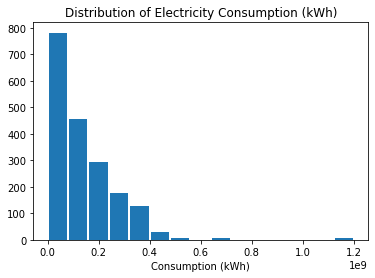

In [49]:
# To create a histgram an example of the positively skewed distribution 
Mdf['Consumption (kWh)'].hist(
    bins=15,
    grid = False,
    rwidth = 0.9
)
    
plt.xlabel("Consumption (kWh)")
plt.title("Distribution of Electricity Consumption (kWh)")
plt.savefig('hist.png')

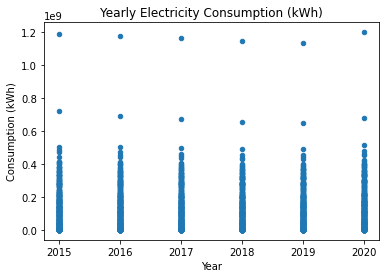

In [52]:
# To visualise high electricity consumers in each year  
Mdf.plot(kind='scatter',x='Year',y='Consumption (kWh)')
plt.title("Yearly Electricity Consumption (kWh)")
plt.savefig("YearlyElectricityConsumptionPlot.png",transparent=True, bbox_inches='tight')
plt.show()

In [53]:
# To find the high consumers, as outliers using IQR method
# First change the column name
Mdf = Mdf.rename(columns={'Consumption (kWh)':'Consumption'}) 

In [55]:
# To find the high consumers, as outliers
# Finding the outliers / high consumers in the dataset
Q1 = Mdf.Consumption.quantile(0.25) 
Q3 = Mdf.Consumption.quantile(0.75)
IQR = Q3 - Q1 
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR 
Outliers = Mdf[(Mdf.Consumption<lower_limit)|(Mdf.Consumption>upper_limit)]
Outliers

,Year,LA,Consumption
16,2015,Birmingham,1.189095e+09
63,2015,County Durham,4.858902e+08
108,2015,Glasgow City,7.234403e+08
154,2015,Manchester,5.028174e+08
178,2015,North Lanarkshire,4.714363e+08
330,2016,Birmingham,1.177851e+09
377,2016,County Durham,4.749545e+08
422,2016,Glasgow City,6.895402e+08
468,2016,Manchester,5.006865e+08
492,2016,North Lanarkshire,4.547420e+08


In [57]:
len(Outliers)

28

In [58]:
len(Mdf)

1884

In [59]:
quotient = 28/ 1884
percent = quotient * 100
print(percent)

1.48619957537155


From this we can see that 1.5% of the electricity consumption data are abnormally high consumers. However, the high consumption local authorities repeat throughout the years, high consumption levels are unlikely to be abnormal as they are routinely repeated 2015 - 2020, therefore outliers will not be removed as these values cannot be substantially assumed to be erroneous.  

## Data cleaning 
2. Population data 

In [62]:
# Description of data 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 353
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LA          2124 non-null   object
 1   Population  2124 non-null   object
 2   Year        2124 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 66.4+ KB


In [72]:
# It would appear that there is no missing data, but there could be non-standard missing values
# Making a list 
missing_values = ["No data", "n/a", "na", "--"]
df3 = pd.read_csv("Population_Data.csv", na_values = missing_values)

In [73]:
print(df3['Population'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
2119    False
2120    False
2121    False
2122    False
2123    False
Name: Population, Length: 2124, dtype: bool


In [74]:
print(df3.isnull().sum())

Unnamed: 0     0
LA             0
Population    48
Year           0
dtype: int64


Here we can see there are 48 missing values which is 2.3% of the population data available. This is a small proportion of the data and should not significantly affect the results if removed. Replacing with the median, mean or mode, could violate assumptions of the data. An appropriate method in this case is to remove those rows of local authority data. 

In [102]:
df3 = df3.dropna(how = 'all')
df3

,Unnamed: 0,LA,Population,Year
0,0,County Durham,519347.0,2015
1,1,Darlington,105998.0,2015
2,2,Hartlepool,92498.0,2015
3,3,Middlesbrough,139310.0,2015
4,4,Northumberland,316453.0,2015
...,...,...,...,...
2119,349,Caerphilly / Caerffili,181731.0,2020
2120,350,Blaenau Gwent / Blaenau Gwent,70020.0,2020
2121,351,Torfaen / Tor-faen,94832.0,2020
2122,352,Monmouthshire / Sir Fynwy,95164.0,2020


In [103]:
# Now we've removed missing values, we can convert the population to floats, so it's the same as 'Consumption (kWh)' for comparison
# Converting Population values from objects to floats 
df3['Population'] = df3['Population'].astype(float)
print(df3.dtypes)

Unnamed: 0      int64
LA             object
Population    float64
Year            int64
dtype: object


In [77]:
# Reveiwing description of the data
df3.describe()

,Unnamed: 0,Population,Year
count,2124.000000,2.076000e+03,2124.000000
mean,176.500000,1.701766e+05,2017.500000
std,102.214655,1.159517e+05,1.708227
min,0.000000,2.224000e+03,2015.000000
25%,88.000000,9.892750e+04,2016.000000
50%,176.500000,1.336255e+05,2017.500000
75%,265.000000,2.088965e+05,2019.000000
max,353.000000,1.141816e+06,2020.000000


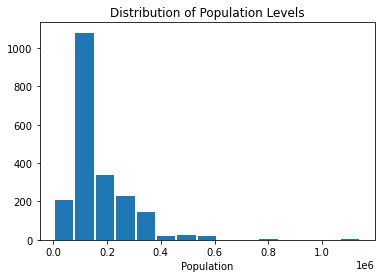

In [78]:
# # To create a histgram as an example of the positively skewed distribution 
df3['Population'].hist(
    bins=15,
    grid = False,
    rwidth = 0.9
)
    
plt.xlabel("Population")
plt.title("Distribution of Population Levels")
plt.savefig('Phist.png')

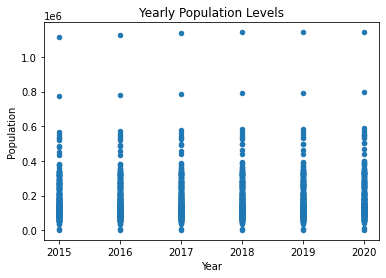

In [79]:
# To visualise high population levels in each year  
df3.plot(kind='scatter',x='Year',y='Population')
plt.title("Yearly Population Levels")
plt.savefig("YearlyPopulationPlot.png",transparent=True, bbox_inches='tight')
plt.show()

In [81]:
# To find the high consumers, as outliers
# Finding the outliers / high consumers in the dataset
Q1 = df3.Population.quantile(0.25) 
Q3 = df3.Population.quantile(0.75)
IQR = Q3 - Q1 
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR 
Outliers2 = df3[(df3.Population<lower_limit)|(df3.Population>upper_limit)]
Outliers2

,Unnamed: 0,LA,Population,Year
0,0,County Durham,519347.0,2015
14,14,Cheshire East,375722.0,2015
26,26,Manchester,529809.0,2015
47,47,Liverpool,480873.0,2015
66,66,Sheffield,569177.0,2015
...,...,...,...,...
2063,293,"Bournemouth, Christchurch and Poole",396989.0,2020
2065,295,"Bristol, City of",465866.0,2020
2066,296,Cornwall,573299.0,2020
2067,297,Dorset,379791.0,2020


In [82]:
len(Outliers2)

88

In [83]:
len(df3)

2124

In [84]:
quotient = 88/ 2124
percent = quotient * 100
print(percent)

4.143126177024483


From this process we can see that local authorities with high population levels consist of 4.1% of the data. These data rows will not be removed as there is no substantial reason the population levels are erroneous.

### Final data processing 
Merging datasets for analysis 

In [85]:
# Merge the datasets on columns 'Year' and 'Local Authority (LA)'
df4 = pd.merge(Mdf, df3, on=['LA','Year'], how='inner')
df4

,Year,LA,Consumption,Unnamed: 0,Population
0,2015,Allerdale,2.977479e+07,18,96756.0
1,2015,Amber Valley,2.900973e+07,76,124188.0
2,2015,Ashfield,6.717296e+05,105,123577.0
3,2015,Ashford,2.756001e+06,257,124047.0
4,2015,Babergh,3.879529e+07,182,89900.0
...,...,...,...,...,...
1633,2020,Worcester,1.354678e+08,139,100265.0
1634,2020,Wychavon,7.889945e+07,140,131084.0
1635,2020,Wyre,1.639803e+08,45,113067.0
1636,2020,Wyre Forest,1.346409e+06,141,101139.0


In [86]:
# Remove column
to_drop = ['Unnamed: 0']
df4.drop(to_drop, inplace=True, axis=1)

In [205]:
# Final check for missing values
print(df4.isnull().sum())

Year                             0
LA                               0
Consumption                      0
Population                      30
Consumption (kWh) Per Capita    30
dtype: int64


In [206]:
# Remove rows with missing values
df4 = df4.dropna()

In [207]:
# Final check for missing values
print(df4.isnull().sum())

Year                            0
LA                              0
Consumption                     0
Population                      0
Consumption (kWh) Per Capita    0
dtype: int64


## Data analysis 

#### Regression analysis

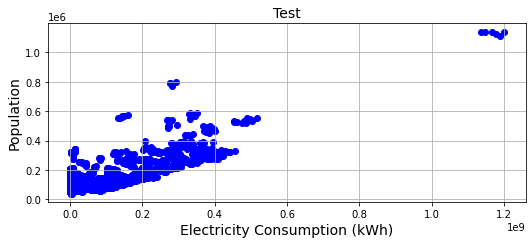

In [131]:
# Checking the linearity of the data 
plt.scatter(df4['Consumption'], df4['Population'], color='blue')
plt.title('Test', fontsize=14)
plt.xlabel('Electricity Consumption (kWh)', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.grid(True)
plt.show()

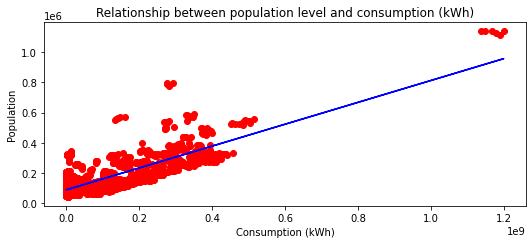

In [218]:
X = df4[["Consumption"]]
y = df4[["Population"]]

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Relationship between population level and consumption (kWh)')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Population')
plt.savefig("Regression.png", transparent=True, bbox_inches='tight')
plt.show()

In [216]:
x = [df4['Consumption']]
y = [df4['Population']]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

slope, intercept, r_value**2, r_value, p_value, std_err

(0.0007241007080947299,
 88442.5854457301,
 0.5870072176655579,
 0.7661639626513099,
 nan,
 nan)

The R-Value is 0.77, which indicates a moderate-strong positive relationship. R-Squared Value is 0.59 which indicates the predictive regression model is weak-moderately substantial. The visual graph and fitted regression line supports this view that that as population increases, as does electricity consumption.

In [243]:
df4.max()

Year                                         2020
LA                                           York
Consumption                     1199652681.887427
Population                              1141816.0
Consumption (kWh) Per Capita          1589.835556
dtype: object

In [247]:
df4.loc[df4['Consumption'] == 1199652681.887427]

,Year,LA,Consumption,Population,Consumption (kWh) Per Capita
1378,2020,Birmingham,1.199653e+09,1140525.0,1051.842513


In [248]:
df4.loc[df4['Population'] == 1141816.0]

,Year,LA,Consumption,Population,Consumption (kWh) Per Capita
1105,2019,Birmingham,1.136874e+09,1141816.0,995.671799


In [251]:
df4.loc[(df4['Population'] >= 700000) & (df4['Consumption'] >= 2199652)]

,Year,LA,Consumption,Population,Consumption (kWh) Per Capita
13,2015,Birmingham,1.189095e+09,1112950.0,1068.417000
123,2015,Leeds,2.822146e+08,773213.0,364.989413
286,2016,Birmingham,1.177851e+09,1128077.0,1044.123083
396,2016,Leeds,2.825642e+08,781087.0,361.757592
559,2017,Birmingham,1.166447e+09,1137123.0,1025.787590
669,2017,Leeds,2.833567e+08,784846.0,361.034837
832,2018,Birmingham,1.147082e+09,1141374.0,1005.001075
942,2018,Leeds,2.774343e+08,789194.0,351.541363
1105,2019,Birmingham,1.136874e+09,1141816.0,995.671799
1215,2019,Leeds,2.768076e+08,793139.0,349.002696


### How has electricity consumption and population level changed between 2015 and 2020? 

In [282]:
PCsum = df4.groupby('Year').sum() 
PCsum

,Consumption,Population,Consumption (kWh) Per Capita
Year,,,
2015,3.567040e+10,48443148.0,185249.647254
2016,3.540717e+10,48873350.0,182616.520894
2017,3.531317e+10,49186927.0,181524.368256
2018,3.488684e+10,49514301.0,178539.751399
2019,3.506929e+10,49797406.0,178956.309229
2020,3.846728e+10,51947623.0,193924.207197


C:\Users\cvln5\AppData\Local\Temp/ipykernel_19880/3037995145.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


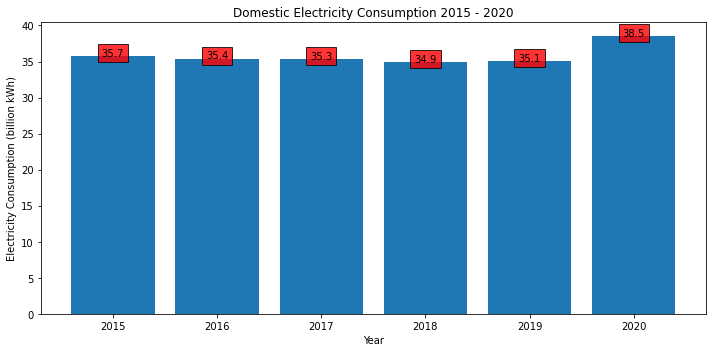

In [285]:
# Electricity consumption change over time 
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
  
if __name__ == '__main__':
    
# creating data on which bar chart will be plot
    x = ["2015", "2016","2017", "2018", "2019","2020"]
    y = [35.7, 35.4, 35.3, 34.9, 35.1, 38.5]
      
# setting figure size by using figure() function 
    plt.figure(figsize = (10, 5))
      
# making the bar chart on the data
    plt.bar(x, y)
      
# calling the function to add value labels
    addlabels(x, y)
      
# giving title to the plot
    plt.title("Domestic Electricity Consumption 2015 - 2020")
      
# giving X and Y labels
    plt.xlabel("Year")
    plt.ylabel("Electricity Consumption (billion kWh)")
    
# Saving 
    plt.savefig("CTotal.png", transparent=True, bbox_inches='tight')
    
# visualizing the plot
    plt.show()

In [286]:
# % of average consumption increase between 2015 and 2020
quotient = (38.5 - 35.7) / 35.7
percent = quotient * 100
print(percent)

7.8431372549019525


C:\Users\cvln5\AppData\Local\Temp/ipykernel_19880/3614154951.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


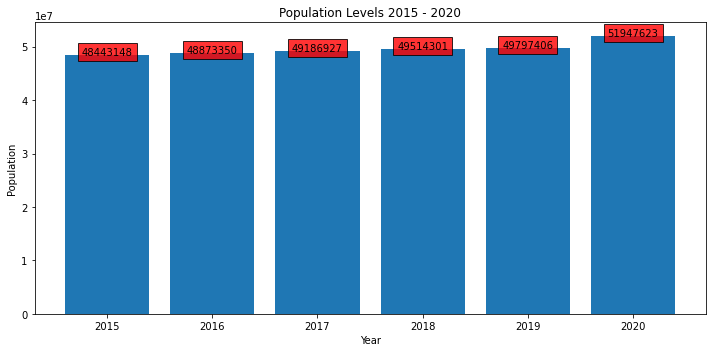

In [287]:
# Population change over time 
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
  
if __name__ == '__main__':
    
# creating data on which bar chart will be plot
    x = ["2015", "2016","2017", "2018", "2019","2020"]
    y = [48443148, 48873350, 49186927, 49514301, 49797406, 51947623]
      
# setting figure size by using figure() function 
    plt.figure(figsize = (10, 5))
      
# making the bar chart on the data
    plt.bar(x, y)
      
# calling the function to add value labels
    addlabels(x, y)
      
# giving title to the plot
    plt.title("Population Levels 2015 - 2020")
      
# giving X and Y labels
    plt.xlabel("Year")
    plt.ylabel("Population")
    
# Saving 
    plt.savefig("PTotal.png", transparent=True, bbox_inches='tight')
    
# visualizing the plot
    plt.show()

In [288]:
# % of average population increase
quotient = (51947623 - 48443148) / 48443148
percent = quotient * 100
print(percent)

7.234201625377443


In [219]:
# To group data by each year to assess the electricity consumption - population correlation between years 
df20 = df4.loc[df4['Year'] == 2020]
df19 = df4.loc[df4['Year'] == 2019]
df18 = df4.loc[df4['Year'] == 2018]
df17 = df4.loc[df4['Year'] == 2017]
df16 = df4.loc[df4['Year'] == 2016]
df15 = df4.loc[df4['Year'] == 2015]

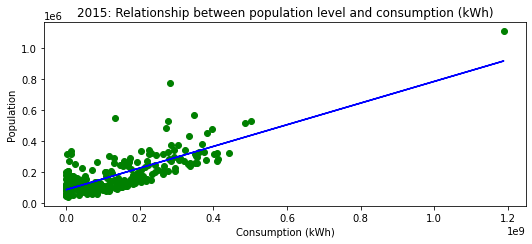

In [222]:
# Correlation between population and consumption in 2015
X = df15[["Consumption"]]
y = df15[["Population"]]

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'green')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('2015: Relationship between population level and consumption (kWh)')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Population')
plt.savefig("Regression2.png", transparent=True, bbox_inches='tight')
plt.show()

In [230]:
# Correlation between population and consumption in 2015 
x = [df15['Consumption']]
y = [df15['Population']]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

slope, intercept, r_value**2, r_value, p_value, std_err

C:\Users\cvln5\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\cvln5\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


(0.0006979194174581104,
 88195.0803754581,
 0.587684517353704,
 0.7666058422381765,
 nan,
 nan)

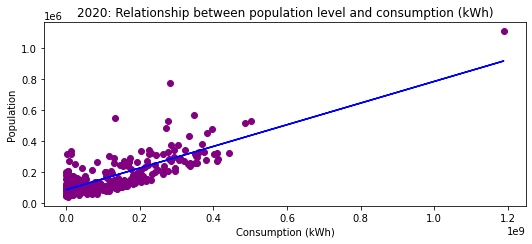

In [229]:
# Correlation between population and consumption in 2020
X2 = df20[["Consumption"]]
y2 = df20[["Population"]]

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'purple')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('2020: Relationship between population level and consumption (kWh)')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Population')
plt.savefig("Regression3.png", transparent=True, bbox_inches='tight')
plt.show()

In [231]:
# Correlation between population and consumption in 2020
x = [df20['Consumption']]
y = [df20['Population']]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

slope, intercept, r_value**2, r_value, p_value, std_err

(0.0007159875967420391,
 89397.54903637769,
 0.5798931997254249,
 0.7615071895428335,
 nan,
 nan)

#### Electricity consumption per capita

In [209]:
# Create per capita column 
df4["Consumption (kWh) Per Capita"] = df4["Consumption"]/df4["Population"]
df4

C:\Users\cvln5\AppData\Local\Temp/ipykernel_19880/1059449815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Consumption (kWh) Per Capita"] = df4["Consumption"]/df4["Population"]


,Year,LA,Consumption,Population,Consumption (kWh) Per Capita
0,2015,Allerdale,2.977479e+07,96756.0,307.730695
1,2015,Amber Valley,2.900973e+07,124188.0,233.595294
2,2015,Ashfield,6.717296e+05,123577.0,5.435717
3,2015,Ashford,2.756001e+06,124047.0,22.217391
4,2015,Babergh,3.879529e+07,89900.0,431.538283
...,...,...,...,...,...
1633,2020,Worcester,1.354678e+08,100265.0,1351.097276
1634,2020,Wychavon,7.889945e+07,131084.0,601.899915
1635,2020,Wyre,1.639803e+08,113067.0,1450.293142
1636,2020,Wyre Forest,1.346409e+06,101139.0,13.312461


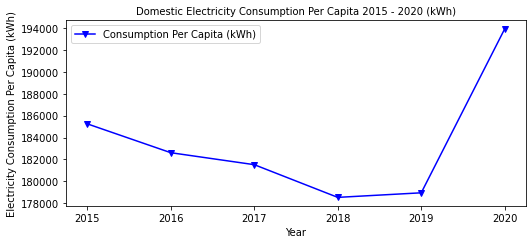

In [284]:
# Line plot of electricity consumption per capita 2015 to 2020
plt.plot(PCsum['Consumption (kWh) Per Capita'], label = "Consumption Per Capita (kWh)", color='blue', marker ='v')
# add legend
plt.legend()
#add axes labels and a title
plt.ylabel('Electricity Consumption Per Capita (kWh)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.title('Domestic Electricity Consumption Per Capita 2015 - 2020 (kWh)', fontsize=10)
#display
plt.savefig("PC.png", transparent=True, bbox_inches='tight')
plt.show()